In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.shape 

(13320, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK        

In [7]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [8]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<AxesSubplot:>

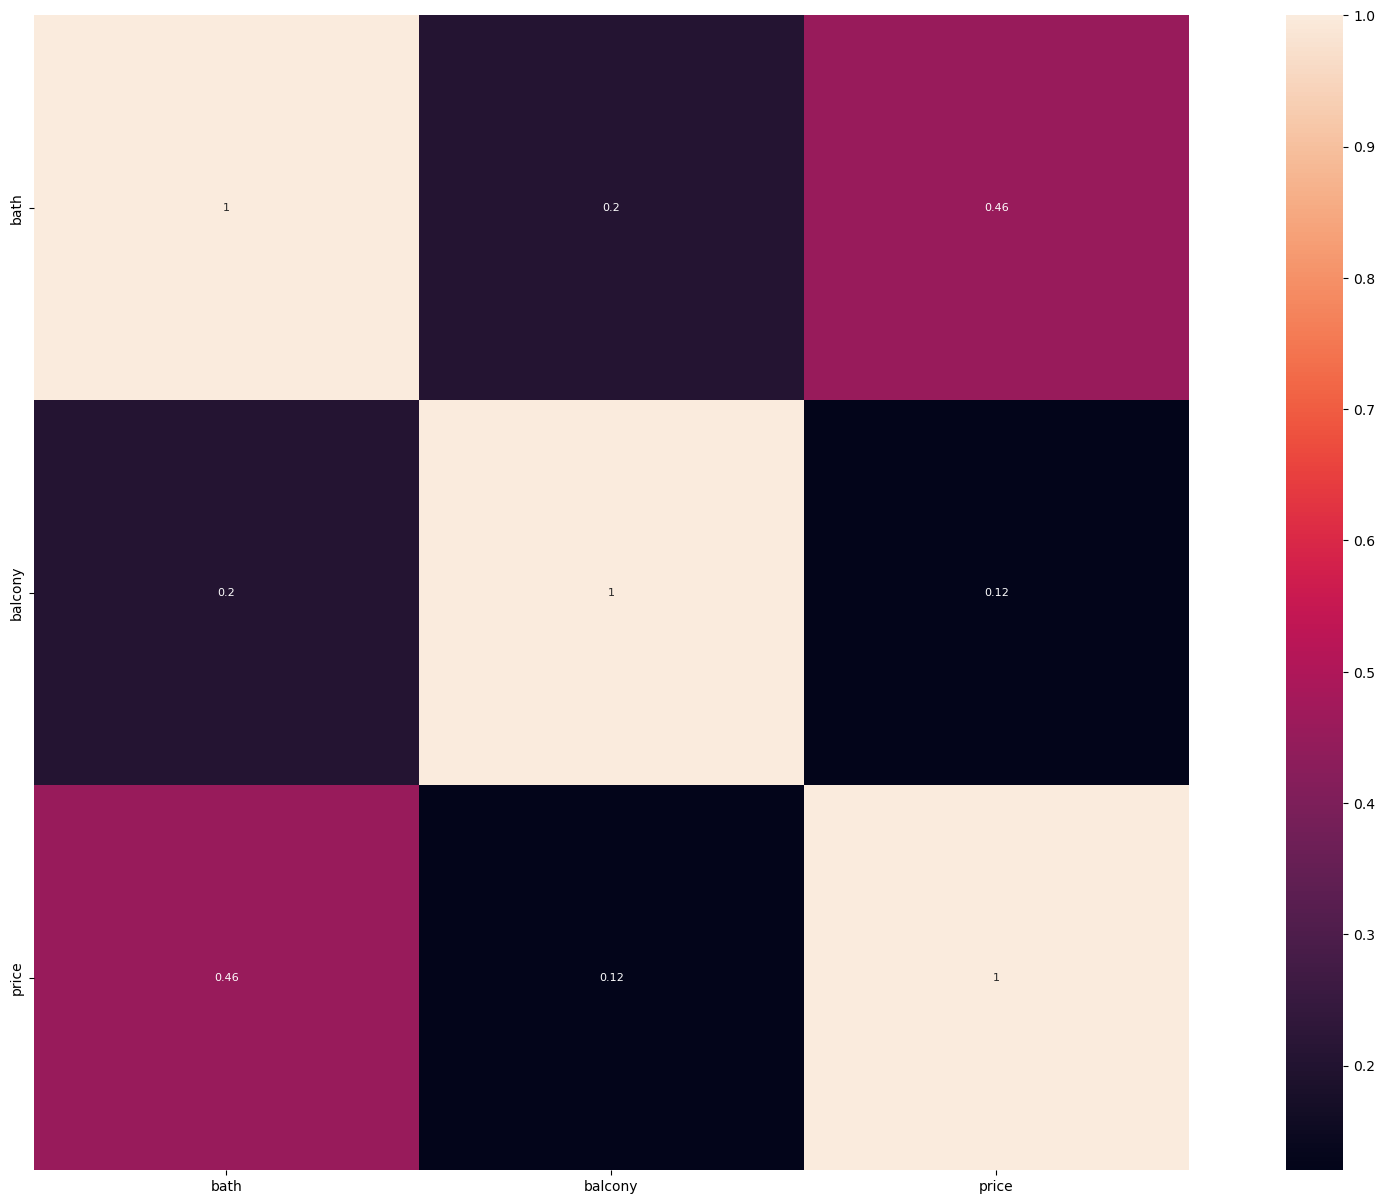

In [9]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':8})

In [10]:
data.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [11]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
data.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [14]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [15]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [16]:
data['location'] = data['location'].fillna('Sarjapur Road')

In [17]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [18]:
data['size'] = data['size'].fillna('2 BHK')

In [19]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [21]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [22]:
data['bhk']=data['size'].str.split().str.get(0).astype(int)

In [23]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [24]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [25]:
 data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [27]:
def convertRange(x):

    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [29]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [30]:
data

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [31]:
data['price_per_sqft'] = data['price'] *100000 / data['total_sqft']

In [32]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [33]:
data.describe() 

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [34]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: location, Length: 1306, dtype: int64

In [35]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [36]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count = data['location'].value_counts()

In [37]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
location_count

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       304
Kanakpura Road                        273
Thanisandra                           237
                                     ... 
1Channasandra                           1
Hosahalli                               1
Vijayabank bank layout                  1
near Ramanashree California resort      1
Abshot Layout                           1
Name: location, Length: 1295, dtype: int64

In [39]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: location, Length: 1054, dtype: int64

In [40]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [41]:
data['location'].value_counts()

other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [42]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [43]:
data.describe() 

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [44]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [45]:
data = data[((data['total_sqft']/data['bhk']) >= 300)]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [46]:
data.shape

(12530, 7)

In [47]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [48]:
data.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [49]:
data.drop(columns=['price'],inplace=True)

In [50]:
data['price'] = data['total_sqft'] * data['price_per_sqft'].mean() / 100000


In [51]:
data

,location,size,total_sqft,bath,bhk,price_per_sqft,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,2,3699.810606,66.570022
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4,4615.384615,163.903463
2,Uttarahalli,3 BHK,1440.0,2.0,3,4305.555556,90.777303
3,Lingadheeranahalli,3 BHK,1521.0,3.0,3,6245.890861,95.883526
4,Kothanur,2 BHK,1200.0,2.0,2,4250.000000,75.647752
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,5,6689.834926,217.676407
13316,other,4 BHK,3600.0,5.0,4,11111.111111,226.943257
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,2,5258.545136,71.928404
13318,Padmanabhanagar,4 BHK,4689.0,4.0,4,10407.336319,295.593592


In [52]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    #groupby gives us the key and subdf value
    for key,subdf in df.groupby('location'):
        #find mean value of every price_per_sqft data 
        m = np.mean(subdf.price_per_sqft)
        #find standard deviation value of every price_per_sqft data 
        st = np.std(subdf.price_per_sqft)
        #now we drop the data which are outlier & store data   
        #which are in between 1 mean and standard deviation   
        
        #here we have( 23 45 67 87 98 ) and suppose that std = 20 so m-st = 3 and m+st= 43 
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output
data = remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,bhk,price_per_sqft,price
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,2.574896,5659.062876,95.091785
std,880.694214,0.979449,0.897649,2265.774749,55.518781
min,300.000000,1.000000,1.000000,1250.000000,18.911938
25%,1110.000000,2.000000,2.000000,4244.897959,69.974171
50%,1286.000000,2.000000,2.000000,5175.600739,81.069175
75%,1650.000000,3.000000,3.000000,6428.571429,104.015659
max,30400.000000,16.000000,16.000000,24509.803922,1916.409725


In [53]:
data

,location,size,total_sqft,bath,bhk,price_per_sqft,price
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,15017.543860,179.663412
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,11901.840491,102.754864
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3,12533.333333,118.199613
3,1st Block Jayanagar,3 BHK,1200.0,2.0,3,10833.333333,75.647752
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2,11983.805668,77.854145
...,...,...,...,...,...,...,...
10296,other,2 BHK,1353.0,2.0,2,8130.081301,85.292841
10297,other,1 Bedroom,812.0,1.0,1,3201.970443,51.188312
10298,other,3 BHK,1440.0,2.0,3,4439.583333,90.777303
10299,other,2 BHK,1075.0,2.0,2,4465.116279,67.767778


In [54]:
def bhk_outlier_remover(df):
    #here we gone a store that indices which we want to exclude in this array
    exclude_indices = np.array([])
    #on df we group by on basis of location and got 
    #location and it's sub data frame
    for loacation, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            } 
         #print(location, bhk_stats)   
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [55]:
data

,location,size,total_sqft,bath,bhk,price_per_sqft,price
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,15017.543860,179.663412
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,11901.840491,102.754864
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3,12533.333333,118.199613
3,1st Block Jayanagar,3 BHK,1200.0,2.0,3,10833.333333,75.647752
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2,11983.805668,77.854145
...,...,...,...,...,...,...,...
10296,other,2 BHK,1353.0,2.0,2,8130.081301,85.292841
10297,other,1 Bedroom,812.0,1.0,1,3201.970443,51.188312
10298,other,3 BHK,1440.0,2.0,3,4439.583333,90.777303
10299,other,2 BHK,1075.0,2.0,2,4465.116279,67.767778


In [56]:
data=bhk_outlier_remover(data)

In [57]:
data.shape

(7361, 7)

In [58]:
data

,location,size,total_sqft,bath,bhk,price_per_sqft,price
0,1st Block Jayanagar,4 BHK,2850.0,4.0,4,15017.543860,179.663412
1,1st Block Jayanagar,3 BHK,1630.0,3.0,3,11901.840491,102.754864
2,1st Block Jayanagar,3 BHK,1875.0,2.0,3,12533.333333,118.199613
3,1st Block Jayanagar,3 BHK,1200.0,2.0,3,10833.333333,75.647752
4,1st Block Jayanagar,2 BHK,1235.0,2.0,2,11983.805668,77.854145
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,2,5833.333333,75.647752
10293,other,1 BHK,1800.0,1.0,1,11111.111111,113.471628
10296,other,2 BHK,1353.0,2.0,2,8130.081301,85.292841
10297,other,1 Bedroom,812.0,1.0,1,3201.970443,51.188312


In [59]:
data.drop(columns=['size'],inplace=True)

In [60]:
data.head()

,location,total_sqft,bath,bhk,price_per_sqft,price
0,1st Block Jayanagar,2850.0,4.0,4,15017.543860,179.663412
1,1st Block Jayanagar,1630.0,3.0,3,11901.840491,102.754864
2,1st Block Jayanagar,1875.0,2.0,3,12533.333333,118.199613
3,1st Block Jayanagar,1200.0,2.0,3,10833.333333,75.647752
4,1st Block Jayanagar,1235.0,2.0,2,11983.805668,77.854145


In [61]:
data.to_csv('Cleaned_data.csv')

In [62]:
X=data.drop(columns=['price'])
y=data['price']

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [65]:
print(X_train.shape)
print(X_test.shape)

(5152, 5)
(2209, 5)


In [66]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder='passthrough')

In [67]:
scaler = StandardScaler()

In [68]:
lr = LinearRegression()

In [69]:
dt = DecisionTreeRegressor()

In [70]:
rf = RandomForestRegressor()

In [71]:
gb = GradientBoostingRegressor()

In [72]:
pipe = make_pipeline(column_trans,scaler,lr)

In [73]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [74]:
y_pred_lr = pipe.predict(X_test)
linear = r2_score(y_test, y_pred_lr)
print(linear)

1.0


In [75]:
pipe = make_pipeline(column_trans,scaler,dt)

In [76]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [77]:
y_pred_dt = pipe.predict(X_test)
decision = r2_score(y_test, y_pred_dt)
print(decision)

0.9926656465020607


In [78]:
pipe = make_pipeline(column_trans,scaler,rf)

In [79]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [80]:
y_pred_rf = pipe.predict(X_test)
random = r2_score(y_test, y_pred_rf)
print(random)

0.9989823064307934


In [81]:
pipe = make_pipeline(column_trans,scaler,gb)

In [82]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [83]:
y_pred_gb = pipe.predict(X_test)
gradient = r2_score(y_test, y_pred_gb)
print(gradient)

0.9994721092054263


In [84]:
import pandas as pd

models = pd.DataFrame({
    "Model": ["Random Forest",
              "Gradient Boost Regressor",
              "Linear Regression",
              "Decision Tree"],
    
    "r2_score": [random, gradient, linear, decision]
})


In [85]:
models

,Model,r2_score
0,Random Forest,0.998982
1,Gradient Boost Regressor,0.999472
2,Linear Regression,1.000000
3,Decision Tree,0.992666


,Model,r2_score
3,Decision Tree,0.992666
0,Random Forest,0.998982
1,Gradient Boost Regressor,0.999472
2,Linear Regression,1.000000


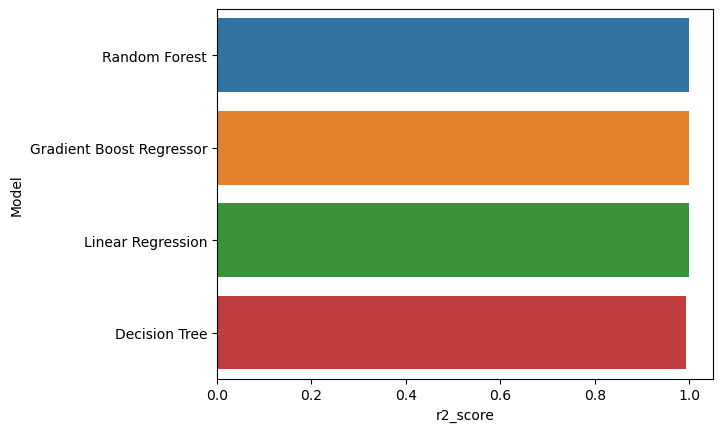

In [86]:
sns.barplot(x="r2_score", y="Model", data=models)

models.sort_values(by='r2_score', ascending=True)

In [87]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [88]:
# Load the dataset
df = pd.read_csv('Cleaned_data.csv')

In [89]:
# Convert location string into numerical data
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])

In [90]:
# Split data into train and test sets
X = df[['location', 'bhk', 'bath', 'total_sqft']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [92]:
# Predict house prices using test data
y_pred = gb_regressor.predict(X_test)

In [93]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 0.3188529114545764


In [94]:
# Predict house price for a new data point
new_data = pd.DataFrame({'location': ['1st Block Jayanagar'], 'bhk': [3], 'bath': [2], 'total_sqft': [2000]})
new_data['location'] = label_encoder.transform(new_data['location'])
predicted_price = gb_regressor.predict(new_data)[0]


In [95]:
# Find houses with similar prices
similar_houses = df[(df['price'] > predicted_price*0.9) & (df['price'] < predicted_price*1.1)]
similar_houses = similar_houses.sort_values(by='price', ascending=True).head(10)


In [96]:
# Print recommended houses
print('Recommended Houses:')
for i, row in similar_houses.iterrows():
    print('House', i+1)
    print('Location:', label_encoder.inverse_transform([row['location'].astype(int)])[0])
    print('BHK:', row['bhk'])
    print('Bath:', row['bath'])
    print('Square Feet:', row['total_sqft'])
    print('Price:', row['price'])
    print('\n')

Recommended Houses:
House 6724
Location: other
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 6612
Location: other
BHK: 3.0
Bath: 4.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2117
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2150
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2187
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2228
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2225
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 78
Location: 6th Phase JP Nagar
BHK: 3.0
Bath: 3.0
Square Feet: 1810.0
Price: 114.10202637065964


House 2984
Location: Jakkur
BHK: 3.0
Bath: 3.0
Square Feet: 1816.0
Price: 114.48026513210937


House 2203
Location: Haralur Road
BHK: 3.0
Bath: 3.0
Square Feet: 1817.0
Price: 114.543

In [97]:
import joblib
joblib.dump(gb,'model.pkl')

['model.pkl']

In [98]:
import pickle

In [99]:
pickle.dump(gb_regressor,open('GradientBoostingRegressorModel.pkl', 'wb'))

In [102]:
import tkinter as tk
from PIL import ImageTk, Image
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

root = tk.Tk()
root.title("House Price computation and recommendation")


img = Image.open("C:\\Users\\model\\Downloads\\background.jpeg")
img = img.resize((600, 400), Image.ANTIALIAS)
background_image = ImageTk.PhotoImage(img)


canvas = tk.Canvas(root, width=600, height=1400)
canvas.pack(fill="both", expand=True)
canvas.create_image(0, 0, image=background_image, anchor="nw")

label_location = tk.Label(canvas, text="Location:")
label_location.pack()
entry_location = tk.Entry(canvas)
entry_location.pack()

label_bhk = tk.Label(canvas, text="BHK:")
label_bhk.pack()
entry_bhk = tk.Entry(canvas)
entry_bhk.pack()

label_bath = tk.Label(canvas, text="Bath:")
label_bath.pack()
entry_bath = tk.Entry(canvas)
entry_bath.pack()

label_total_sqft = tk.Label(canvas, text="Total Sqft:")
label_total_sqft.pack()
entry_total_sqft = tk.Entry(canvas)
entry_total_sqft.pack()

def predict_price():
    location = entry_location.get()
    bhk = int(entry_bhk.get())
    bath = int(entry_bath.get())
    total_sqft = float(entry_total_sqft.get())

    predicted_price = total_sqft * price_per_sqft.mean()
    text_box.insert(tk.END, f"Predicted Price: {predicted_price}\n\n")

    similar_houses = df[(df['price'] > predicted_price*0.9) & (df['price'] < predicted_price*1.1)]
    similar_houses = similar_houses.sort_values(by='price', ascending=True).head(10)

    text_box.insert(tk.END, "Recommended Houses:\n\n")
    for i, row in similar_houses.iterrows():
        text_box.insert(tk.END, f"House {i+1}\n")
        text_box.insert(tk.END, f"Location: {label_encoder.inverse_transform([row['location'].astype(int)])[0]}\n")
        text_box.insert(tk.END, f"BHK: {row['bhk']}\n")
        text_box.insert(tk.END, f"Bath: {row['bath']}\n")
        text_box.insert(tk.END, f"Square Feet: {row['total_sqft']}\n")
        text_box.insert(tk.END, f"Price: {row['price']}\n\n")


btn_predict = tk.Button(canvas, text="Predict", command=predict_price)
btn_predict.pack()

text_box = tk.Text(canvas, height=10, width=40)
text_box.pack()

train_data = pd.read_csv('Cleaned_data.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
price_per_sqft = train_data['price'] / train_data['total_sqft']
target_col = 'price'
X = train_data.drop(target_col, axis=1)
y = train_data[target_col]
label_encoder = LabelEncoder()
label_encoder.fit(X['location'])
X['location'] = label_encoder.transform(X['location'])
preprocessor = ColumnTransformer([('scaler', StandardScaler(), ['bhk', 'bath', 'total_sqft'])], remainder='passthrough')
gb_regressor = make_pipeline(preprocessor, GradientBoostingRegressor())
gb_regressor.fit(X, y)

root.mainloop()

In [101]:
''''
import tkinter as tk
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

root = tk.Tk()
root.title("House Price computation and recommendation")

label_location = tk.Label(root, text="Location:")
label_location.pack()
entry_location = tk.Entry(root)
entry_location.pack()

label_bhk = tk.Label(root, text="BHK:")
label_bhk.pack()
entry_bhk = tk.Entry(root)
entry_bhk.pack()

label_bath = tk.Label(root, text="Bath:")
label_bath.pack()
entry_bath = tk.Entry(root)
entry_bath.pack()

label_total_sqft = tk.Label(root, text="Total Sqft:")
label_total_sqft.pack()
entry_total_sqft = tk.Entry(root)
entry_total_sqft.pack()

def predict_price():
    location = entry_location.get()
    bhk = int(entry_bhk.get())
    bath = int(entry_bath.get())
    total_sqft = float(entry_total_sqft.get())

    predicted_price = total_sqft * price_per_sqft.mean()
    text_box.insert(tk.END, f"Predicted Price: {predicted_price}\n\n")

    similar_houses = df[(df['price'] > predicted_price*0.9) & (df['price'] < predicted_price*1.1)]
    similar_houses = similar_houses.sort_values(by='price', ascending=True).head(10)

    text_box.insert(tk.END, "Recommended Houses:\n\n")
    for i, row in similar_houses.iterrows():
        text_box.insert(tk.END, f"House {i+1}\n")
        text_box.insert(tk.END, f"Location: {label_encoder.inverse_transform([row['location'].astype(int)])[0]}\n")
        text_box.insert(tk.END, f"BHK: {row['bhk']}\n")
        text_box.insert(tk.END, f"Bath: {row['bath']}\n")
        text_box.insert(tk.END, f"Square Feet: {row['total_sqft']}\n")
        text_box.insert(tk.END, f"Price: {row['price']}\n\n")


btn_predict = tk.Button(root, text="Predict", command=predict_price)
btn_predict.pack()

text_box = tk.Text(root, height=10, width=60)
text_box.pack()

train_data = pd.read_csv('Cleaned_data.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
price_per_sqft = train_data['price'] / train_data['total_sqft']
target_col = 'price'
X = train_data.drop(target_col, axis=1)
y = train_data[target_col]
label_encoder = LabelEncoder()
label_encoder.fit(X['location'])
X['location'] = label_encoder.transform(X['location'])
preprocessor = ColumnTransformer([('scaler', StandardScaler(), ['bhk', 'bath', 'total_sqft'])], remainder='passthrough')
gb_regressor = make_pipeline(preprocessor, GradientBoostingRegressor())
gb_regressor.fit(X, y)

root.mainloop()

''''

SyntaxError: EOL while scanning string literal (3033313779.py, line 76)